# Machine Learning WPO1: Introduction

In this session we introduce the basics of datasets and learning models. This document is an interactive Python notebook, containing both the assignments and code. You can evaluate cells in the document by selecting them and and pressing <i>shift+enter</i>.  Work through the document and evaluate the code cells one by one to see the output. You will need to complete a number of  Python functions.

Below is the command to import the necessary libraries in python: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # Plotting.
import numpy as np  # Basic array and vector math.

In this session we will look at the different elements of a Machine learning problem. Recall that Tom Mitchell defines learning as follows:

<i> "A computer program is said to <b>learn</b> from <b/>experience E</b> with respect to some class of </b>tasks T</b> and <b>performance measure P</b>, if its performance at tasks in T, as measured by P, improves with experience E"</i>

## Experience: Data

In most machine learning settings experience will be respresented as a dataset which contains examples of the concept we want to learn. In <b> supervised learning</b> the data consists of a number of <b>instances</b>, e.g. input-output samples $(x_1,x_2,...,x_d,y)$. The $x_i$ represent the <b>inputs or features</b>, $y$ represents our <b>target or output</b>. A dataset typically contains a large number of these samples. 

The goal of a supervised machine learning algorithm is to learn from this data a <b>model</b> or <b>hypothesis</b> that represents the mapping from $x_i$ to $y$, i.e. the function $y=f(x_1,x_2,...,x_d)$. We can then use this model to predict the output y for a new sample when only the $x_i$ are known. When all $y$ values belong to a small discrete set (e.g. spam/not spam) we call this a <b>classification</b> problem, if $y$ is very large or even continuous, this is a <b>regression</b> problem.

As an example, run the code below to load the example diabetes dataset from the scikit-learn library. In this dataset we have data on 442 diabetes patients. X consists of  10 physiological variables (age, sex, body mass index, average blood pressure, and six blood serum measurements) and the y indicates the progression of the disease.


In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()  # Load example dataset.

# Input training data and target values.
X = diabetes.data
y = diabetes.target

# Get number of instances and number of features.
num_inst = X.shape[0]
num_feat = X.shape[1]

print(num_inst)
print(num_feat)

442
10


The variable X now contains the feature values for all instances in the data set. It is represented as a 2D array, with rows corresponding to patients and columns corresponding to features, i.e. each row in X is an instance that represents a set of measurements for a single patient (e.g. age, weight, bloodpressure,...). Each column in X represents measurements for a certain feature (e.g. age) for all patients. The variable y is a 1D array containing the target output for each patient. 

<a href='http://docs.scipy.org/doc/numpy/user/basics.indexing.html'>Numpy array indexing </a> can be used to extract single values or subarrays from these arrays:

In [3]:
X[111, 0]  # Age features for patient 111 (features values are normalized, so this is not a value in years).

0.01991321417832592

In [4]:
X[220, :]  # All measurements on patient 220.

array([ 0.02354575,  0.05068012, -0.03961813, -0.00567042, -0.04835136,
       -0.03325502,  0.01182372, -0.03949338, -0.10163996, -0.06735141])

In [5]:
X[20:30, 3]  # The values of the 4th (0 based indexing) feature (blood pressure) for patients 20-30.

array([-0.04354178,  0.00121528, -0.00911327,  0.0310648 , -0.02288468,
       -0.04009893, -0.02632753, -0.04009893, -0.07452744,  0.0631866 ])

In [6]:
y[220]  # Target output for patient 220.

78.0

Besides indexing with ranges, Numpy also allows boolean indexing:

In [7]:
y[y > 150]  # All y values greater than 150.

array([151., 206., 310., 179., 185., 171., 166., 168., 245., 184., 202.,
       283., 341., 265., 276., 252., 259., 190., 155., 225., 182., 170.,
       170., 163., 160., 178., 270., 202., 170., 200., 252., 210., 164.,
       162., 279., 302., 198., 232., 246., 297., 258., 229., 275., 281.,
       179., 200., 200., 173., 180., 161., 268., 274., 158., 272., 280.,
       336., 281., 317., 235., 174., 259., 178., 288., 292., 197., 186.,
       195., 217., 172., 214., 220., 268., 152., 295., 151., 237., 225.,
       151., 185., 265., 292., 178., 158., 196., 222., 277., 196., 202.,
       155., 191., 263., 248., 296., 214., 185., 252., 208., 160., 220.,
       154., 259., 246., 257., 262., 275., 177., 187., 258., 215., 303.,
       243., 310., 153., 346., 308., 264., 202., 182., 241., 283., 200.,
       265., 230., 181., 156., 233., 219., 332., 248., 200., 275., 198.,
       236., 253., 172., 180., 163., 220., 190., 191., 230., 242., 248.,
       249., 192., 237., 244., 199., 270., 164., 30

Matplotlib contains useful plotting functions to visualize your datasets. Histograms can be used to investigate the distribution of values of a feature across the instances:

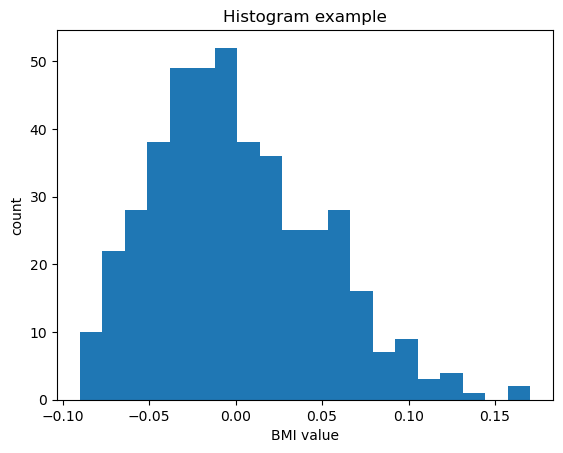

In [8]:
plt.figure()  # Create a figure.
ax = plt.subplot(1, 1, 1)

ax.hist(X[:, 2], 20)  # Create a histogram for the third feature.
plt.xlabel('BMI value')
plt.ylabel('count')
plt.title('Histogram example')

plt.show()  # Show figure.

Scatterplots can be used to show the relation between 2 features or a feature and the target output.

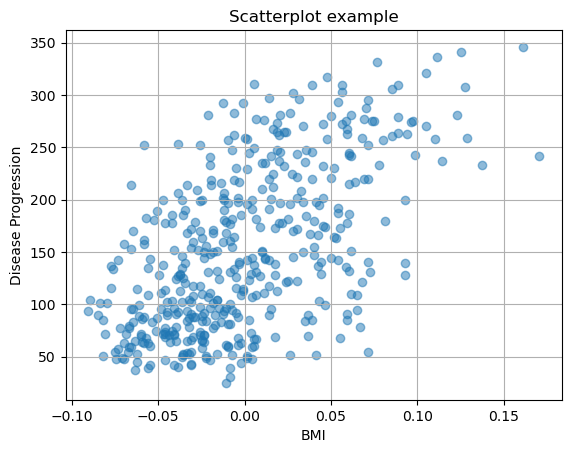

In [9]:
plt.figure()  # Create a figure.
ax = plt.subplot(1, 1, 1)

ax.scatter(X[:, 2], y, alpha=0.5)  # Create a scatterplot for the third feature and outputs.
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatterplot example')
ax.grid(True)

#show figure
plt.show()

## Task: learn to predict y from X


In the task described above, we want to learn to predict the value of the output variable y, given
the value of input variable(s) X.  For simplicity, we will consider only 1 of the variables 
in our data set: the patient's Body Mass Index(X[:,2]).

So in our example data set we now have: 
<ul>
<li> X(i) = the BMI of patient i
<li> y(i) = the disease progression of patient i
</ul>

Each sample gives the target output value y(i) for the corresponding input x(i). 
A <b>model</b> $h$ (or hypothesis):

\begin{equation}
\hat{y} = h_{\theta}(x) 
\end{equation}

takes x as input and returns our
estimated output value $\hat{y}$. The model typically has some parameters $\theta$ that we adapt to optimize the model's performance.

In our case, the hypothesis will predict a
patient's disease progression, based on their BMI. To do this we will use a simple linear regresion model. A linear model is one of the simplest models that can be considered for this task. 
It assumes that the output variable y is a linear function
of the inputs x. When the inputs x are 1-dimensional such a model can be
written as:

\begin{equation}
\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x
\end{equation}

Here $\mathbf{\theta} = [\theta_0; \theta_1]$ is a vector of the parameters of the model (in case of a linear model $\theta_0$ and $\theta_1$ are the intercept and slope of our line, respectively). 

The goal of regression is to find values for $\theta$ such that $h_{\theta}(x)$ is close to y, for any input x.

In [10]:
X = X[:, 2]  # Select input feature from X.

### Making Predictions


First we implement the model predictions. 

<b>Complete the function linear_predict(X,theta), given below.</b>

This function calculates predictions
for a linear model, given a matrix of inputs X and a parameter vector $\theta$:

<ul>
<li>X is a (m x d) 2D array where m is the number of samples and d is
the input dimension, i.e. each row of X represents a different 
instance and each column of X is a different input dimension. For the
diabetes data we have 442 data points and only 1 input dimension so
X will be a (442 x 1) matrix.
<li> $\theta$ is a vector of length (d+1). In our case this means $\theta$ will have length
2.
<li>The output of the function must be a 1D array which gives the
prediction for each point in X, i.e. for each row of X , $(x_1,x_2,...x_d)$, the
function returns the value $(\theta_0 + \theta_1 *x_1 + \theta_2 *x_2 + ... + \theta_d * x_d)$
</ul>



<b>Note</b>: it is common practice to add a column of ones to matrix X. This column can be viewed as an additional feature $x_0$ that always has value 1 and is referred to as the bias. 

In [11]:
X = np.column_stack((np.ones((num_inst, 1)), X))  # Add bias column to dataset.

We can then treat $\theta_0$ as all the other parameters and write the output as: 

\begin{equation}
 h_\theta(X) = \theta_0*x_0 + \theta_1 *x_1 + \theta_2 *x_2 + ... + \theta_d * x_d
 \end{equation}

Or simply write the prediction for a complete set of inputs as 1 matrix multiplication:

\begin{equation}
h_\theta(X) = X\theta  
\end{equation}

This expression can be directly translated to Python using the Numpy <i>dot(A,B)</i>  function for matrix multiplication. Alternatively, you can explitely loop over all values.

In [12]:
def linear_predict(X, theta):
    p = 0
    #YOUR CODE HERE
    p = np.dot(X, theta)
    return p


# Try predictions with 3 theta vectors.
theta1 = np.array((125, 1500))
theta2 = np.array((320, -1000))
theta3 = np.array((250, 1))

# Make a prediction for the point x=0.15
test_point = np.array((1, 0.15))

p1 = linear_predict(test_point, theta1)
p2 = linear_predict(test_point, theta2)
p3 = linear_predict(test_point, theta3)

print(p1)
print(p2)
print(p3)

350.0
170.0
250.15


Since our models correspond to lines we can easily visualize them:

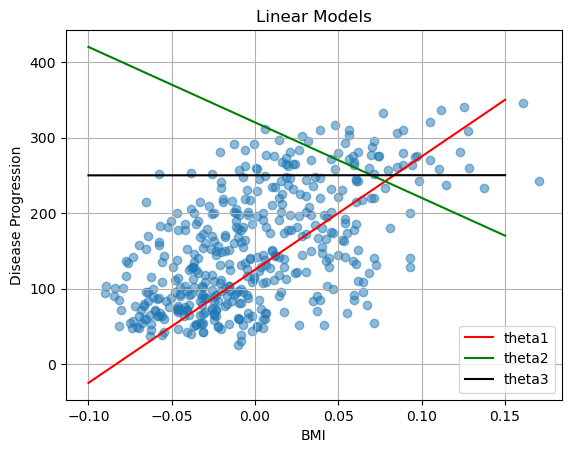

In [13]:
plt.figure()  # Create a figure.
ax = plt.subplot(1, 1, 1)

# Scatter plot for the relation between 3rd feature and outputs.
ax.scatter(X[:, 1], y, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Models')
ax.grid(True)

# Plot function: plot(x-values,y-values,optional style info)

# Plot theta1 model
plt.plot([-0.1, 0.15], [linear_predict(np.array((1, -0.1)), theta1), linear_predict(np.array((1, 0.15)), theta1)], 'r-',
         label='theta1')

# Plot theta2 model
plt.plot([-0.1, 0.15], [linear_predict(np.array((1, -0.1)), theta2), linear_predict(np.array((1, 0.15)), theta2)], 'g-',
         label='theta2')

# Plot theta3 model
plt.plot([-0.1, 0.15], [linear_predict(np.array((1, -0.1)), theta3), linear_predict(np.array((1, 0.15)), theta3)], 'k-',
         label='theta3')

plt.legend()

# Show figure
plt.show()

<b>Q: Which value of $\theta$ corresponds best to the data? A: theta1</b>

### Closed Form Solution
Luckily for us, the linear regression problem has been studied for a long time and a closed form solution is known to obtain the optimal set of weights for your problem. It is given by the following equation:

\begin{equation}
 \theta^\ast = \left(X^TX\right)^{-1}X^TY
\end{equation}

Implement this closed form solution below that takes as input a set of features $X$ and a set of outputs $Y$ and outputs $\theta^\ast$.

In [14]:
def optimal_params(X, y):
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return theta

The optimal parameters: [152.13348416 949.43526038]


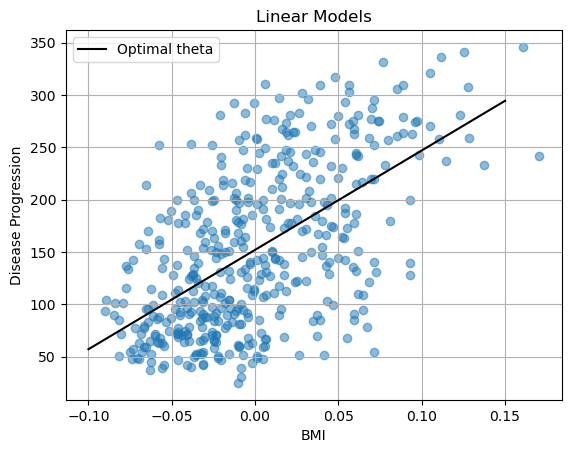

In [15]:
optimal_theta = optimal_params(X, y)
print(f'The optimal parameters: {optimal_theta}')

plt.figure()  # Create a figure.
ax = plt.subplot(1, 1, 1)

# Scatter plot for the relation between 3rd feature and outputs.
ax.scatter(X[:, 1], y, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Models')
ax.grid(True)

plt.plot([-0.1, 0.15],
         [linear_predict(np.array((1, -0.1)), optimal_theta), linear_predict(np.array((1, 0.15)), optimal_theta)], 'k-',
         label='Optimal theta')

plt.legend()
plt.show()

## Performance Measures: Evaluating Models

Above we made predictions using different values for $\theta$. Each value corresponds to a different model. We can see from the plot that some models correspond better to the data than others. In order to learn the best model, we need a way to determine the performance of a model, i.e. we  need to determine how well a given hypothesis fits our data. 

We can evaluate a vector $\theta$, by defining a <b>cost or objective function</b>. This function gives each $\theta$ a score that indicates how wel the model using these parameter values fits the data (usually as an error that we want to minimize). For regression the mean squared error cost function is often used:

\begin{equation}
MSE(X,y,\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation}

where $(x^{(i)},y^{(i)})$ is the ith sample in the dataset (i.e. the data for patient i).

This function calculates the error of our hypothesis (i.e. the difference
between the prediction $h(x^{(i)})$ and the true value $y^{(i)}$for each input sample.
This error is then squared to make sure errors with different signs don't
cancel out. The mean of the squared errors over all our data is the cost (the
additional 2 will become clear below). Lower cost hypotheses give a better fit to the data.
<ul>
<li><b>Complete the <i>mse(p,y)</i> function.</b> This function takes as input a vector
of predictions p and a vector of true values y and returns the mean
squared error.
 <li><b>Calculate the costs for the 3 parameter vectors given in the previous
 section.</b> The correct output values are: 2656.2, 20333.8 and 7751.7.
</ul>

In [16]:
def mse(p, y):
    err = 0.5 * np.dot(p - y, p - y) / len(y)
    return err


pred1 = linear_predict(X, theta1)
pred2 = linear_predict(X, theta2)
pred3 = linear_predict(X, theta3)

print(mse(pred1, y))
print(mse(pred2, y))
print(mse(pred3, y))

2656.2389353482945
20333.791313086098
7751.722997148453


## Learning: improving performance

We now have all the elements needed to define our learning problem: use the data (X,y) to update our model parameters $\theta$ in such a way that we improve the mean squared error value. We want to find the values for $\theta$ that best fit our data. We do this by minimizing the mean squared error with respect to $\theta$. One way of doing this is to use gradient descent. Gradient descent starts with an initial vector $\theta$ and updates the values using following rule:

\begin{equation}
\theta \leftarrow \theta - \alpha \nabla J
\end{equation}

Where $\nabla J$ is the gradient of the cost function w.r.t. $\theta$ and $\alpha$ is a learning rate, which determines how big the update is. This update moves $\theta$ a small step in the direction where the error becomes smaller. For the linear regression model with the MSE cost function, the update for each $\theta_j$ becomes:

\begin{equation}
\theta_j \leftarrow \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) − y^{(i)})x^{(i)}
\end{equation}

Using matrix notation this can be written as:

\begin{equation}
\theta \leftarrow \theta - \alpha \frac{1}{m} X^T (Xθ − y)
\end{equation}

Here T denotes the matrix transpose (``np.transpose()`` or simply ``array.T`` in Python). We assume that $x_0$ is always 1, i.e. we added a column of ones to the data set.

<ul>
<li><b> Complete the linear_grad function.</b>
<li><b>Run the code below to calculate the optimal parameters using the gradient_descent function.</b> The function returns a tuple with 3 elements: the final values for theta, the costs during learning and the values of $\theta$ during learning
<li><b>Try using gradient descent with very large or very small values for $\alpha$. Plot the costs and the parameter values in each case.</b> 
<li><b>Q: What happens when $\alpha$ is too large/too small?</b>
<ul>

In [17]:
def linear_grad(X, y, theta):
    grad = np.dot(np.transpose(X), linear_predict(X, theta) - y) / len(y)
    return grad


# Batch gradient descent.
def grad_descent(X, y, theta0, alpha=0.05, max_iter=1000):
    theta = theta0
    thetas = np.zeros((max_iter, len(theta)))
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        theta -= alpha * linear_grad(X, y, theta)
        thetas[i] = theta
        costs[i] = mse(linear_predict(X, theta), y)
    return theta, thetas, costs

Final learned theta: [152.13348416 939.15250225]


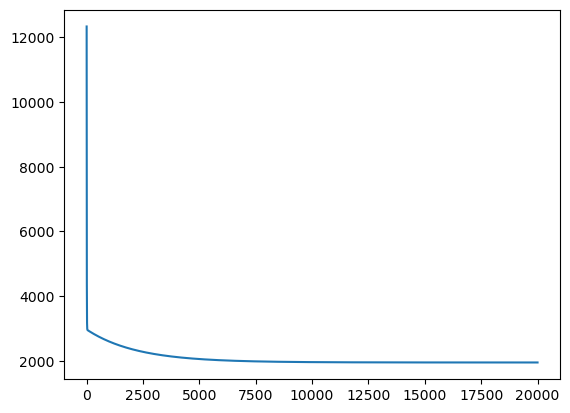

In [18]:
# Intialize parameters for linear model.
theta0 = np.zeros(2)
theta, thetas, costs = grad_descent(X, y, theta0, 0.1, 20000)  # Try different learning rates & iterations.
print(f'Final learned theta: {theta}')

# Plot the evolution of costs during learning.
# For good learning rates, this should go down and then converge.
plt.figure()
plt.plot(costs)

Now we can plot the best model found:

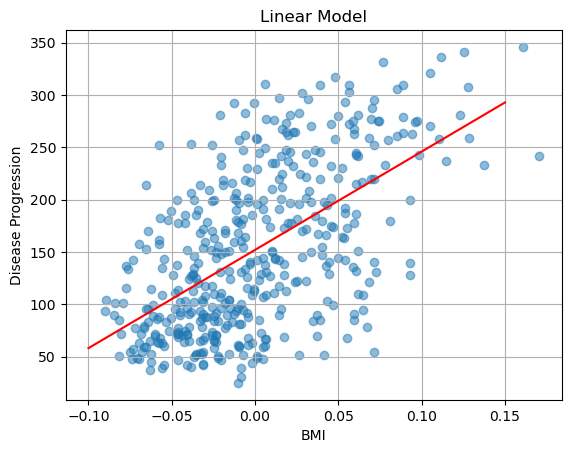

In [19]:
# Create figure.
plt.figure()
ax = plt.subplot(1, 1, 1)

# Scatter plot for the relation between the feature and outputs.
ax.scatter(X[:, 1], y, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Model')
ax.grid(True)

#plot function: plot(x-values,y-values,optional style info)

# Plot the learned model.
plt.plot([-0.1, 0.15], [linear_predict(np.array((1, -0.1)), theta), linear_predict(np.array((1, 0.15)), theta)], 'r-')

# Show the figure.
plt.show()

In this simple problem, we can also visualize the objective function for different values of $\theta$ using a contour plot and show the path gradient descent follows to the optimal parameter settings (red line).

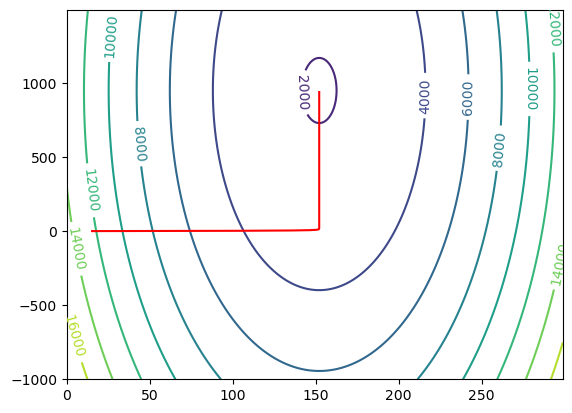

In [20]:
# Generate a grid of points representing parameter values.
xvals = np.arange(0, 300.0, 1)  # theta0
yvals = np.arange(-1000, 1500, 5)  # theta1
xs, ys = np.meshgrid(xvals, yvals)

siz = np.shape(xs)
zs = np.zeros(siz)

# Calculate mean squared error for each theta.
for i in range(siz[0]):
    for j in range(siz[1]):
        p = linear_predict(X, np.array((xs[i, j], ys[i, j])))
        zs[i, j] = mse(p, y)

plt.figure()

# Plot the contours of the objective function.
cs = plt.contour(xs, ys, zs)
plt.clabel(cs, inline=1, fontsize=10)

# Plot thetas examined by gradient descent.
plt.plot(thetas[:, 0], thetas[:, 1], 'r-')